In [6]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calculate_fractal_dim(dla_lattice):
    leni, lenj = dla_lattice.shape

    LMIDi = int(leni / 2)
    LMIDj = int(lenj / 2)
    LMID = min(LMIDi, LMIDj)  # let's ensure quadratic boxes which fit on DLAlattice
    size_vs_num = np.zeros((LMID, 2))
    prev_num = 0
    # loop over s which gives b=2*s+1
    for size in range(LMID):
        num = 0
        # loop over lattice
        for x in range(LMIDi - size, LMIDi + size + 1):
            for y in range(LMIDj - size, LMIDj + size + 1):
                num += dla_lattice[x, y]
        if size > 5 and num == prev_num:
             break
        if num > 0:
            size_vs_num[size] = np.array([np.log(2 * size + 1), np.log(num)])
        prev_num = num
    return size_vs_num[np.nonzero(size_vs_num[:,1])]

In [4]:
size = '27223'
dla_lattice = np.loadtxt(size + '.dat').astype('int')
size_vs_num = calculate_fractal_dim(dla_lattice)

Text(0.5, 1.0, 'Neighboring Range 3 * 3')

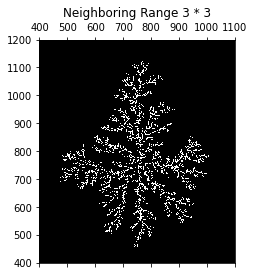

In [12]:
plt.matshow(dla_lattice, cmap='gray')
plt.xlim([400,1100])
plt.ylim([400,1200])
plt.title(f"Neighboring Range 3 * 3")

In [12]:
plt.figure(figsize = (4,4))
start = np.where(size_vs_num[:,0] < 3)[0][-1]
end = np.where(size_vs_num[:,0] >5.3)[0][0]
p = np.polyfit(size_vs_num[start:end, 0], size_vs_num[start:end, 1], 1)
y_fit = np.polyval(p,size_vs_num[:, 0])
fitinfo = 'polyfit = %.3fx+%.3f' % (p[0],p[1])
#plt.plot(size_vs_num[start:end, 0], size_vs_num[start:end, 1],'b.-',label='data point')
plt.plot(size_vs_num[:, 0], size_vs_num[:, 1],'b.-',label='data point')
plt.plot(size_vs_num[:, 0], y_fit,'r-',label=fitinfo)
plt.title(f"Fractal Dimension")
plt.xlabel('$log(b) = log(2*s+1)')
plt.ylabel('$log(N)$')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …